L13 (10/30) Suggested Homework
Question 1, 3, 4 page 22 from Bush textbook

In [48]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Question 1:  


$\frac{dv}{dt} = -1 = \epsilon v^3$

$v(0) = 1$

In [49]:
'''Numerical Solution'''
# Define the ODE function
def ode(t, v, epsilon):
    return -1 - epsilon * v**3

#parameter
epsilon = 0.1  
# Initial condition
v0 = [1]  # v(0) = 1

#solution
t_span = (0, 5)  # Adjust time range as needed
ts = np.linspace(0, 5, 100)  # Points to evaluate the solution
num_solution = solve_ivp(ode, t_span, v0, t_eval=ts, args=(epsilon,))

In [50]:
'''
two-term perturbation expansion
'''
v_perturbation_expansion = 1 - ts + epsilon *((1/4)*(1 - ts)**4 - 1/4) 


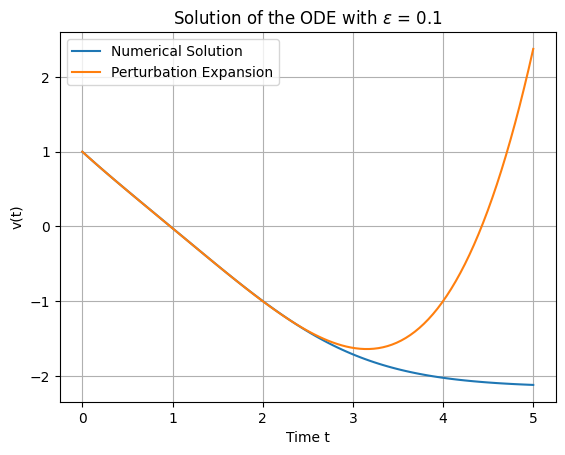

In [51]:
# Plot the solution
plt.plot(num_solution.t, num_solution.y[0], label="Numerical Solution")
#plot two term perturbation expansion
plt.plot(ts, v_perturbation_expansion, label = rf"Perturbation Expansion")

plt.xlabel("Time t")
plt.ylabel("v(t)")
plt.title(f"Solution of the ODE with $\\epsilon$ = {epsilon}")
plt.legend()
plt.grid()
plt.show()

Question 3: 

$\frac{d^2f}{dt^2}  + f = \epsilon \frac{df}{dt}$

$f(0) = 1, \frac{df}{dt}(0) = 0$

In [52]:
# Define the system of first-order equations
def system(t, f, epsilon):
    f1, f2 = f
    df1_dt = f2
    df2_dt = -f1 + epsilon * f2
    return [df1_dt, df2_dt]

# parameter 
epsilon = 0.1  

# Initial conditions
initial_conditions = [1, 0]  # f(0) = 1, f'(0) = 0

t_span = (0, 5)  
ts = np.linspace(0, 5, 200) 
solution = solve_ivp(system, t_span, initial_conditions, t_eval=ts, args=(epsilon,))


In [53]:
f = np.cos(ts) + epsilon * (0.5*ts*np.cos(ts) - 0.5 * np.sin(ts))

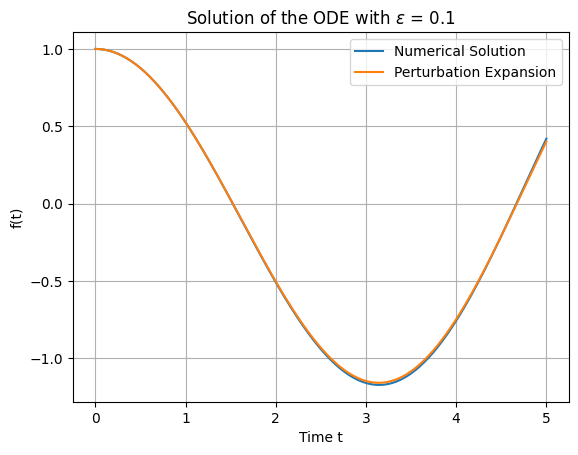

In [54]:
plt.plot(solution.t, solution.y[0], label="Numerical Solution")
plt.plot(ts, f, label = "Perturbation Expansion")
plt.xlabel("Time t")
plt.ylabel("f(t)")
plt.title(f"Solution of the ODE with $\\epsilon$ = {epsilon}")
plt.legend()
plt.grid()
plt.show()